In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error, root_mean_squared_error
from sklearn.preprocessing import StandardScaler, OneHotEncoder, StandardScaler
from sklearn.model_selection import learning_curve


In [2]:

!ls

Data_Sets                    house_price_pridiction.ipynb
env                          requirements.txt


# Loading the DataSets

In [3]:
df = pd.read_csv('Data_Sets/Housing.csv')

# Initial Data exploration

In [4]:
df.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,no,furnished
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,no,furnished


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 545 entries, 0 to 544
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   price             545 non-null    int64 
 1   area              545 non-null    int64 
 2   bedrooms          545 non-null    int64 
 3   bathrooms         545 non-null    int64 
 4   stories           545 non-null    int64 
 5   mainroad          545 non-null    object
 6   guestroom         545 non-null    object
 7   basement          545 non-null    object
 8   hotwaterheating   545 non-null    object
 9   airconditioning   545 non-null    object
 10  parking           545 non-null    int64 
 11  prefarea          545 non-null    object
 12  furnishingstatus  545 non-null    object
dtypes: int64(6), object(7)
memory usage: 55.5+ KB


In [13]:
df.describe()

,price,area,bedrooms,bathrooms,stories,parking
count,5.450000e+02,545.000000,545.000000,545.000000,545.000000,545.000000
mean,4.766729e+06,5150.541284,2.965138,1.286239,1.805505,0.693578
std,1.870440e+06,2170.141023,0.738064,0.502470,0.867492,0.861586
min,1.750000e+06,1650.000000,1.000000,1.000000,1.000000,0.000000
25%,3.430000e+06,3600.000000,2.000000,1.000000,1.000000,0.000000
50%,4.340000e+06,4600.000000,3.000000,1.000000,2.000000,0.000000
75%,5.740000e+06,6360.000000,3.000000,2.000000,2.000000,1.000000
max,1.330000e+07,16200.000000,6.000000,4.000000,4.000000,3.000000


In [14]:
df.describe(include ='all')

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
count,5.450000e+02,545.000000,545.000000,545.000000,545.000000,545,545,545,545,545,545.000000,545,545
unique,NaN,NaN,NaN,NaN,NaN,2,2,2,2,2,NaN,2,3
top,NaN,NaN,NaN,NaN,NaN,yes,no,no,no,no,NaN,no,semi-furnished
freq,NaN,NaN,NaN,NaN,NaN,468,448,354,520,373,NaN,417,227
mean,4.766729e+06,5150.541284,2.965138,1.286239,1.805505,NaN,NaN,NaN,NaN,NaN,0.693578,NaN,NaN
std,1.870440e+06,2170.141023,0.738064,0.502470,0.867492,NaN,NaN,NaN,NaN,NaN,0.861586,NaN,NaN
min,1.750000e+06,1650.000000,1.000000,1.000000,1.000000,NaN,NaN,NaN,NaN,NaN,0.000000,NaN,NaN
25%,3.430000e+06,3600.000000,2.000000,1.000000,1.000000,NaN,NaN,NaN,NaN,NaN,0.000000,NaN,NaN
50%,4.340000e+06,4600.000000,3.000000,1.000000,2.000000,NaN,NaN,NaN,NaN,NaN,0.000000,NaN,NaN
75%,5.740000e+06,6360.000000,3.000000,2.000000,2.000000,NaN,NaN,NaN,NaN,NaN,1.000000,NaN,NaN


In [8]:
df.shape()

TypeError: 'tuple' object is not callable

In [15]:
df.shape

(545, 13)

In [16]:
df.index

RangeIndex(start=0, stop=545, step=1)

In [17]:
df.columns

Index(['price', 'area', 'bedrooms', 'bathrooms', 'stories', 'mainroad',
       'guestroom', 'basement', 'hotwaterheating', 'airconditioning',
       'parking', 'prefarea', 'furnishingstatus'],
      dtype='object')

In [18]:
df.dtypes

price                int64
area                 int64
bedrooms             int64
bathrooms            int64
stories              int64
mainroad            object
guestroom           object
basement            object
hotwaterheating     object
airconditioning     object
parking              int64
prefarea            object
furnishingstatus    object
dtype: object

# Checking for missing Values

In [19]:
df.isna().sum()

price               0
area                0
bedrooms            0
bathrooms           0
stories             0
mainroad            0
guestroom           0
basement            0
hotwaterheating     0
airconditioning     0
parking             0
prefarea            0
furnishingstatus    0
dtype: int64

# Checking for the duplicated Values

In [6]:
df.duplicated().sum()

0

In [21]:
df = df.drop_duplicates().reset_index(

SyntaxError: unexpected EOF while parsing (2372210584.py, line 1)

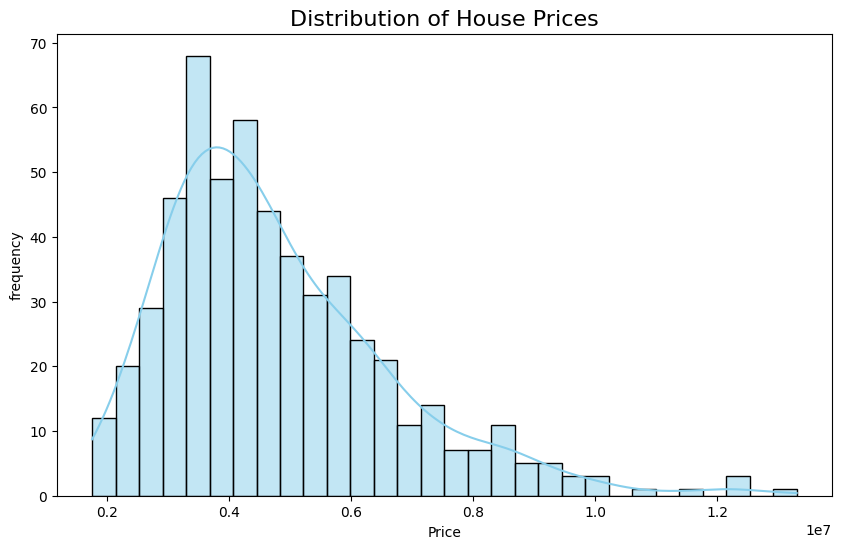

In [7]:
plt.figure(figsize = (10,6))
sns.histplot(df['price'], kde = True, color = 'skyblue', bins = 30)
plt.title("Distribution of House Prices", fontsize = 16)
plt.xlabel("Price")
plt.ylabel("frequency")
plt.show()

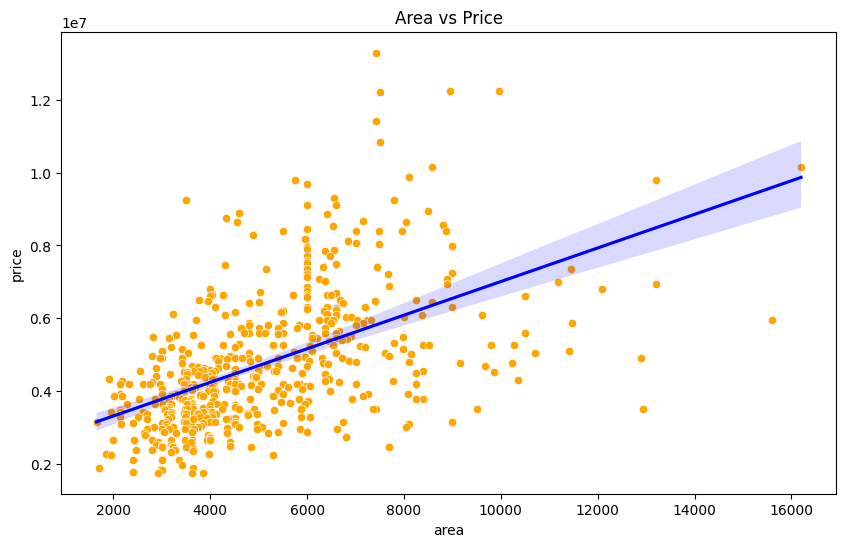

In [8]:
plt.figure (figsize =(10,6))
sns.scatterplot(x='area', y = 'price', data = df, color = 'orange')
sns.regplot(x='area', y = 'price', data = df, scatter = False, color= 'blue')
plt.title("Area vs Price")
plt.show()

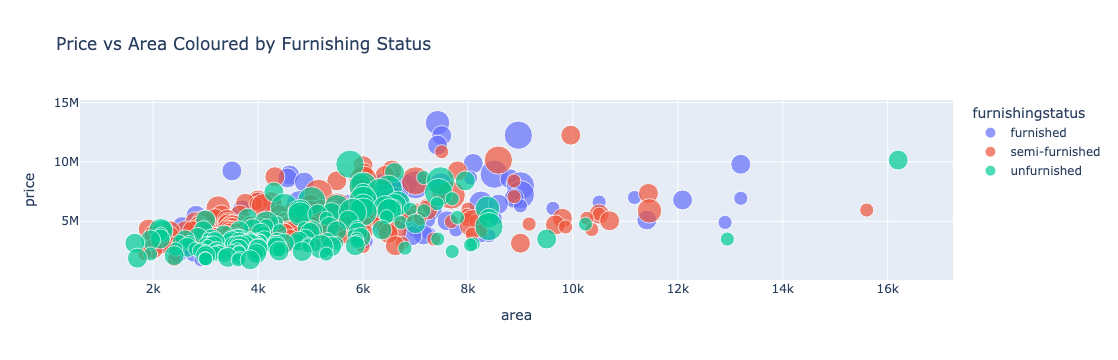

In [9]:
fig = px.scatter(df, x = 'area', y = 'price',
                 color='furnishingstatus',
                 title = 'Price vs Area Coloured by Furnishing Status',
                 size = 'stories',
                 hover_data = ['bedrooms', 'bathrooms', 'parking'])
fig.show()

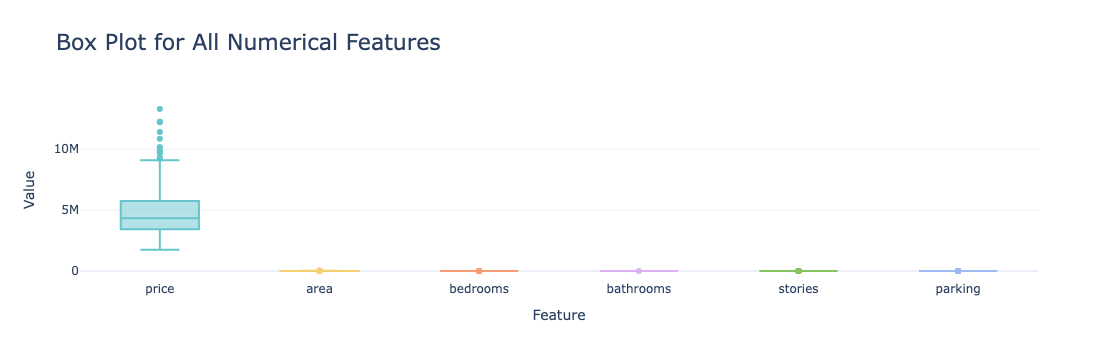

In [10]:
#select numerical columns
numerical_cols = df.select_dtypes(include = 'number').columns

#Melt the DataFrame to long format for plotly
df_melted = df[numerical_cols].melt(var_name='Feature', value_name = 'Value')

fig = px.box(df_melted, x ='Feature', y= 'Value', color = 'Feature',
             title = "Box Plot for All Numerical Features",
             color_discrete_sequence = px.colors.qualitative.Pastel)

fig.update_layout(title_font_size = 22, xaxis_title = "Feature", yaxis_title = "Value", template = "plotly_white", showlegend = False)
fig.show()

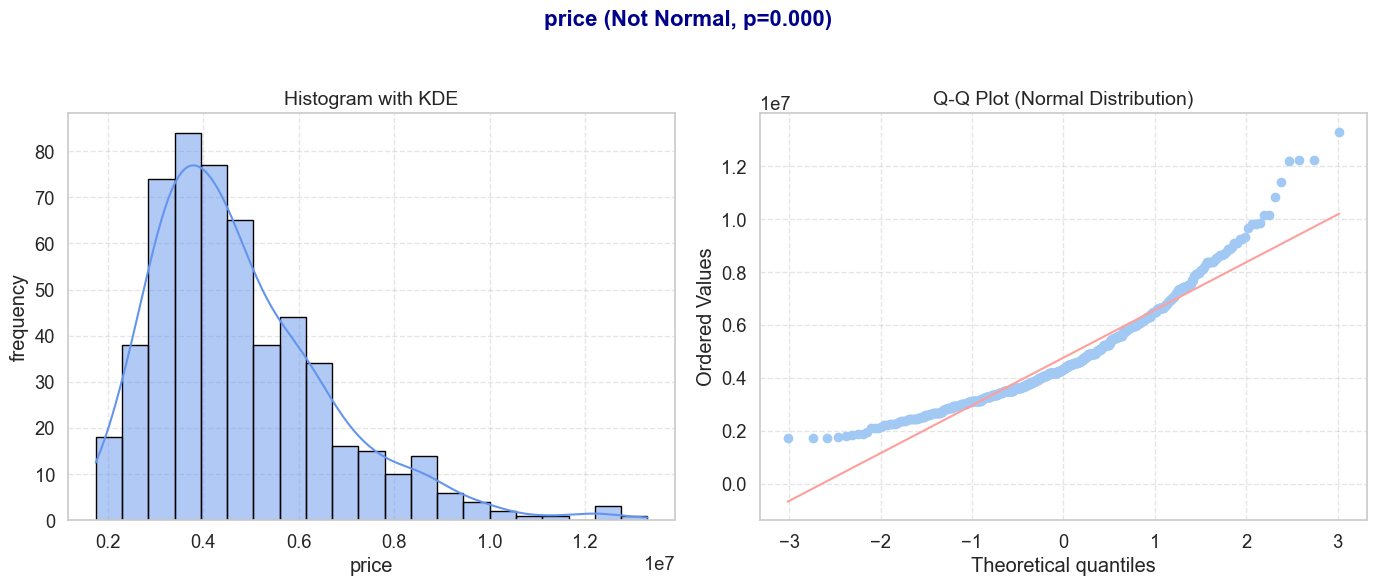

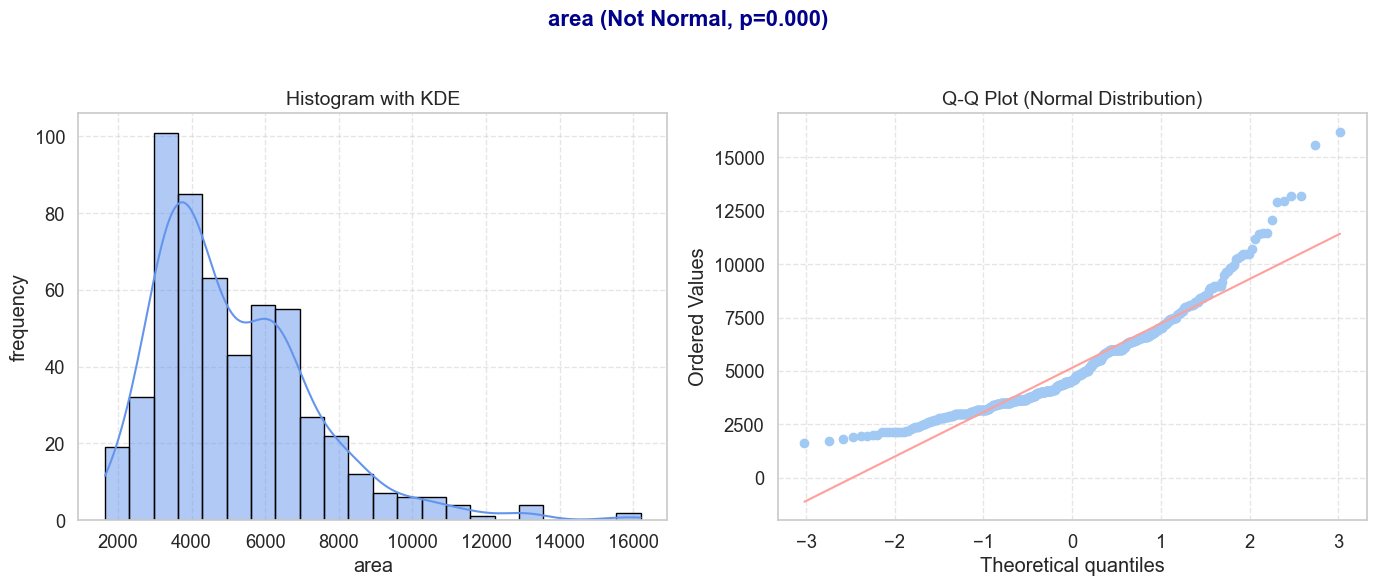

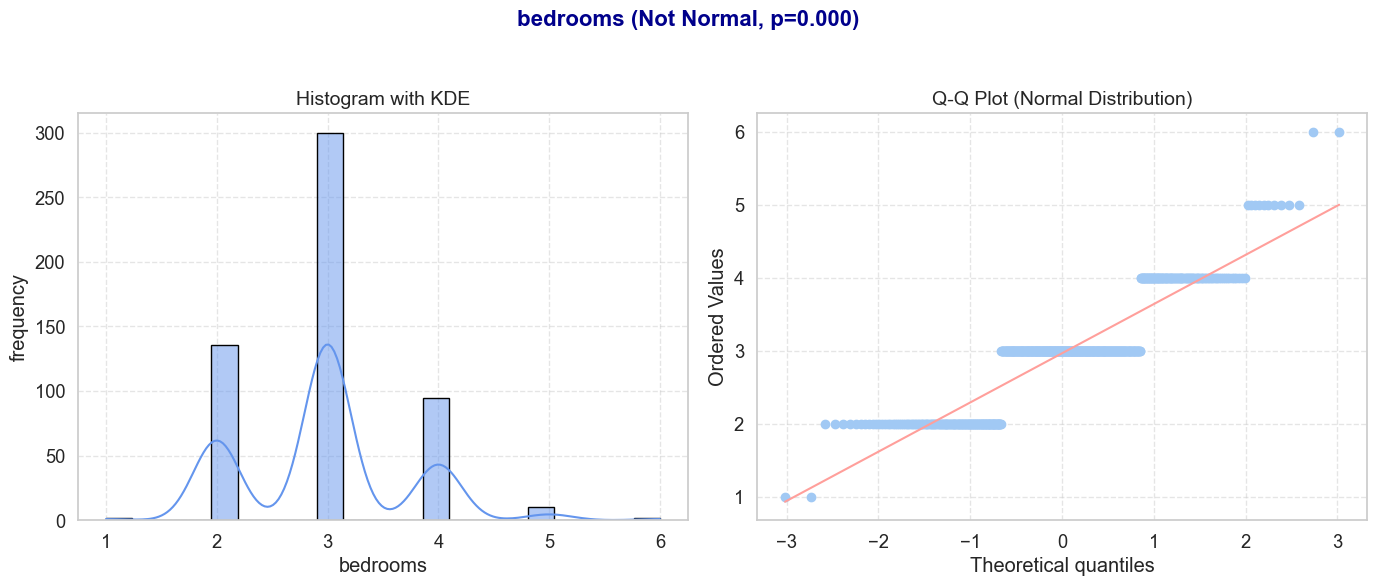

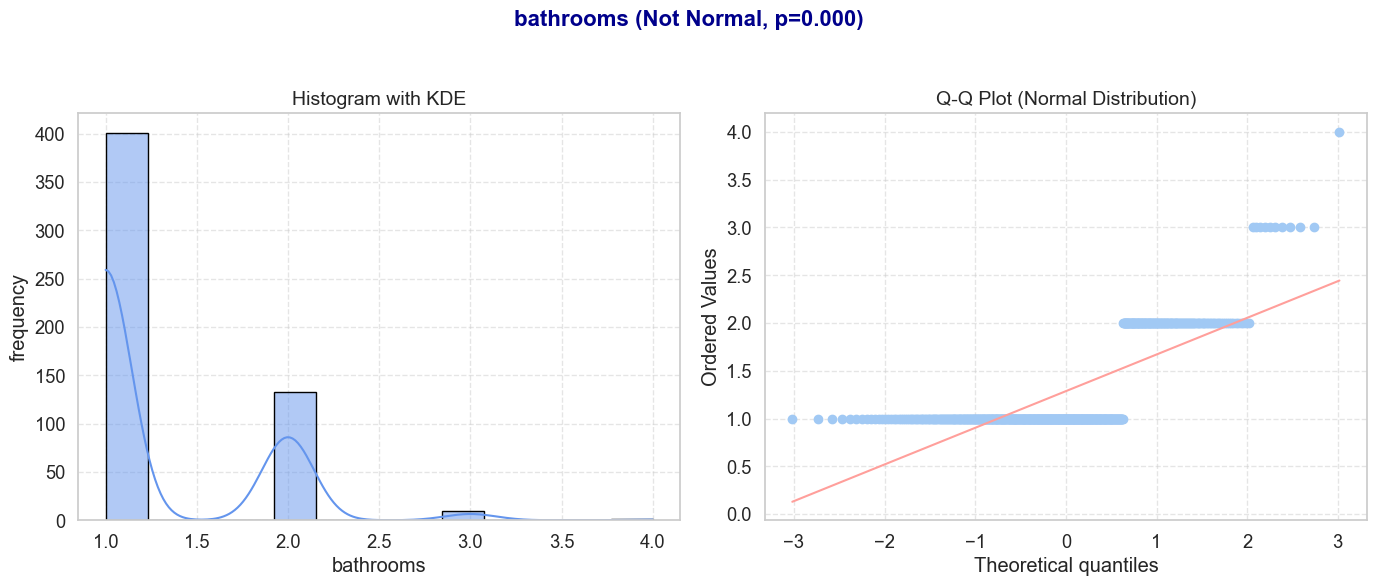

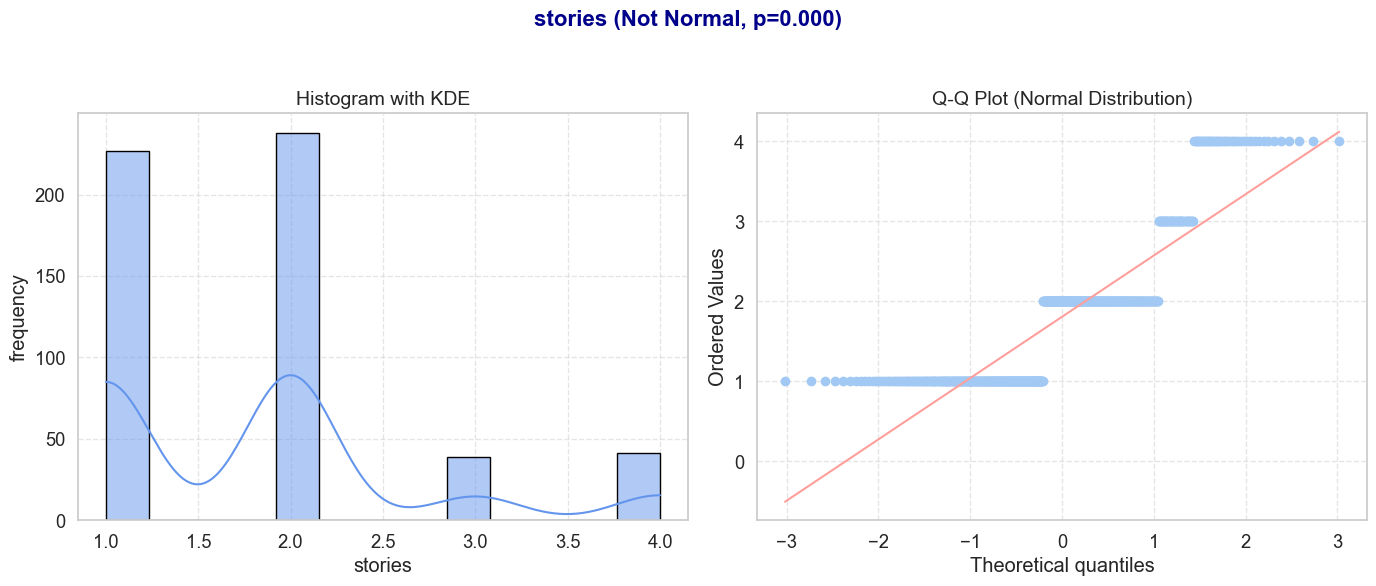

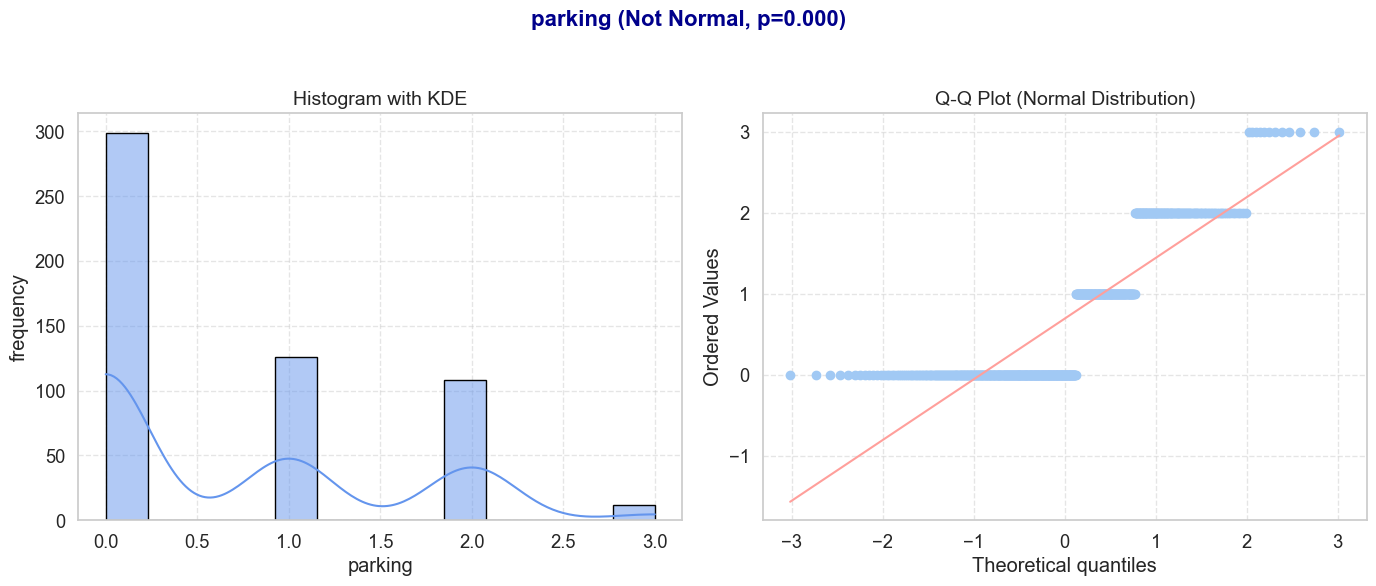

In [11]:
#set a modern seaborn style 

sns.set(style = "whitegrid", palette = "pastel", font_scale= 1.2)

#function to check if data is normally distributed using shapiro test

def is_normal(data, alpha = 0.05):
    stat, p = stats.shapiro(data)
    return p > alpha, p

#function to plot histogram + KDE and Q-Q plot side by side
def plot_distribution_and_qq(data, column):
    values = data[column].dropna()
    normal, p_val = is_normal(values)

    #Title note
    note = "likely Normal" if normal else "Not Normal"
    title_text = f"{column} ({note}, p={p_val:.3f})"

    #create subplots
    fig, axes = plt.subplots(1,2, figsize = (14, 6))

    #Histrogram + KDE
    sns.histplot(values, kde = True, color = 'cornflowerblue', edgecolor= 'black', ax= axes[0])
    axes[0].set_title("Histogram with KDE", fontsize = 14)
    axes[0].set_xlabel(column)
    axes[0].set_ylabel("frequency")
    axes[0].grid(True, linestyle = '--', alpha= 0.5)

    #Q-Q plot
    stats.probplot (values, dist = "norm", plot = axes[1])
    axes[1].set_title("Q-Q Plot (Normal Distribution)", fontsize = 14)
    axes[1].grid(True, linestyle = '--', alpha = 0.5)

    #Overall title
    fig.suptitle(title_text, fontsize= 16, fontweight = 'bold', color = 'darkblue')
    plt.tight_layout(rect =[0,0,1,0.95])
    plt.show()

#Run for all numerical columns (or subset if needed)
numeric_cols = df.select_dtypes(include = 'number').columns

for col in numeric_cols:
    plot_distribution_and_qq(df, col)

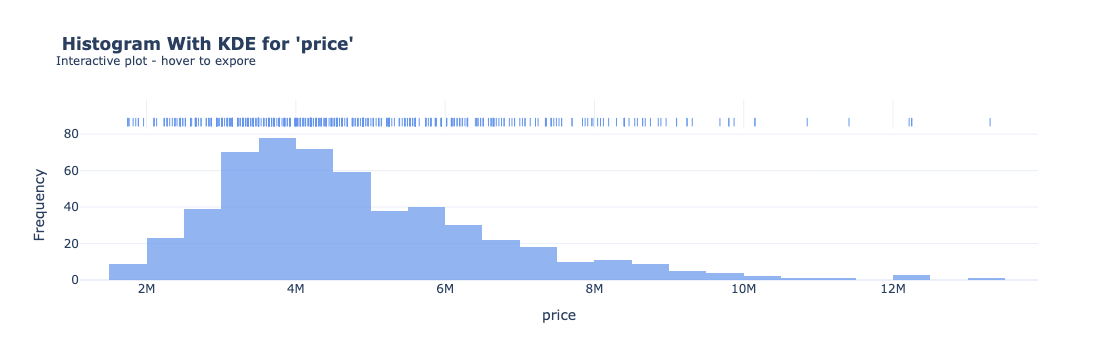

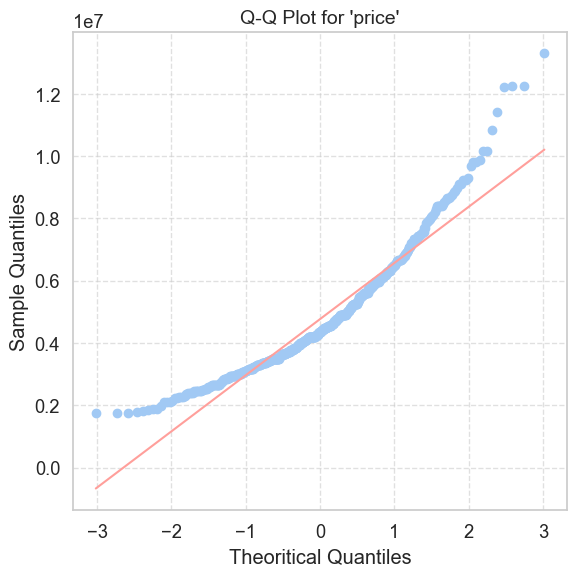


 Normality Tests for 'price':

 .Shapiro-Wilk: 3.154903020052213e-16->Not Normal
 .D'Agostino K^2: 7.060096507152579e-26->Not Normal
 .Anderson-Darling: stat=10.445<crit= 0.781->Not Normal

 Interpretation:
 - p > 0.05 -> Data is likely Normal 
 - p <= 0.05 -> Data is NOT Normal 
 - For Anderson-Darling, if test statistic < critical value at 5%, then Normal 


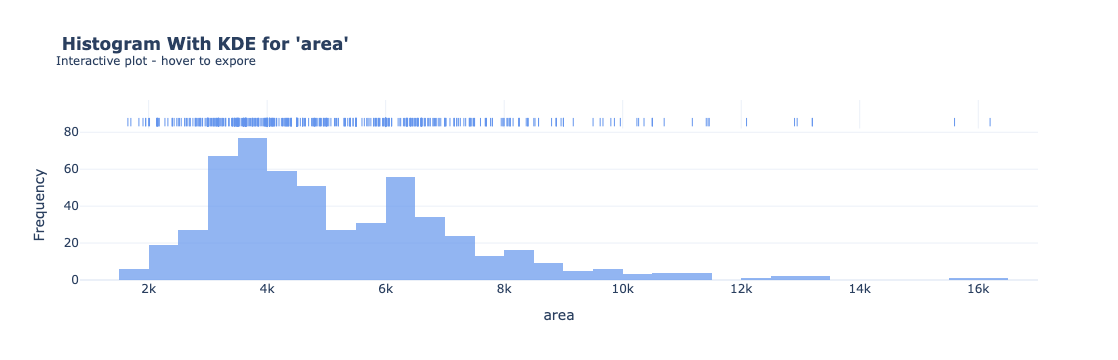

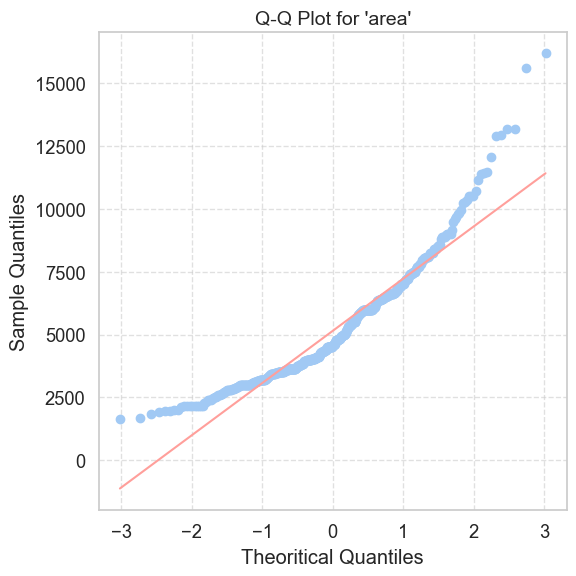


 Normality Tests for 'area':

 .Shapiro-Wilk: 2.5971521072657363e-17->Not Normal
 .D'Agostino K^2: 6.732585875624122e-31->Not Normal
 .Anderson-Darling: stat=10.701<crit= 0.781->Not Normal

 Interpretation:
 - p > 0.05 -> Data is likely Normal 
 - p <= 0.05 -> Data is NOT Normal 
 - For Anderson-Darling, if test statistic < critical value at 5%, then Normal 


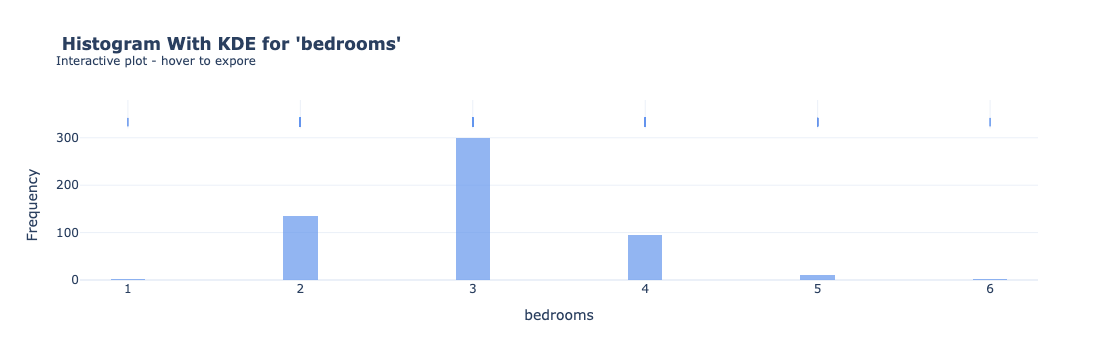

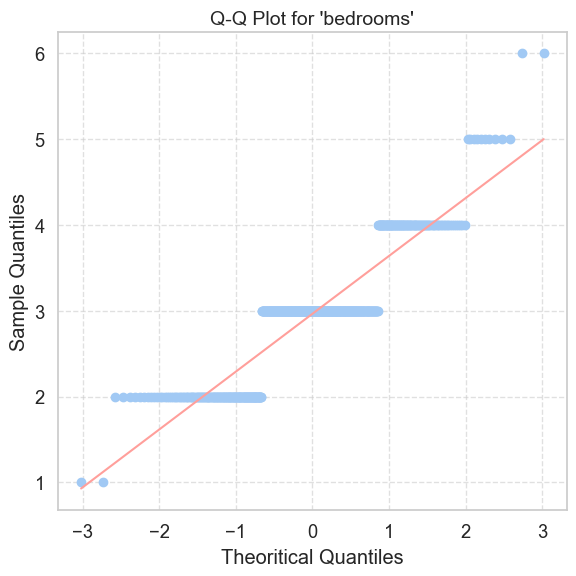


 Normality Tests for 'bedrooms':

 .Shapiro-Wilk: 1.1082903223677254e-23->Not Normal
 .D'Agostino K^2: 7.838900986317864e-07->Not Normal
 .Anderson-Darling: stat=44.039<crit= 0.781->Not Normal

 Interpretation:
 - p > 0.05 -> Data is likely Normal 
 - p <= 0.05 -> Data is NOT Normal 
 - For Anderson-Darling, if test statistic < critical value at 5%, then Normal 


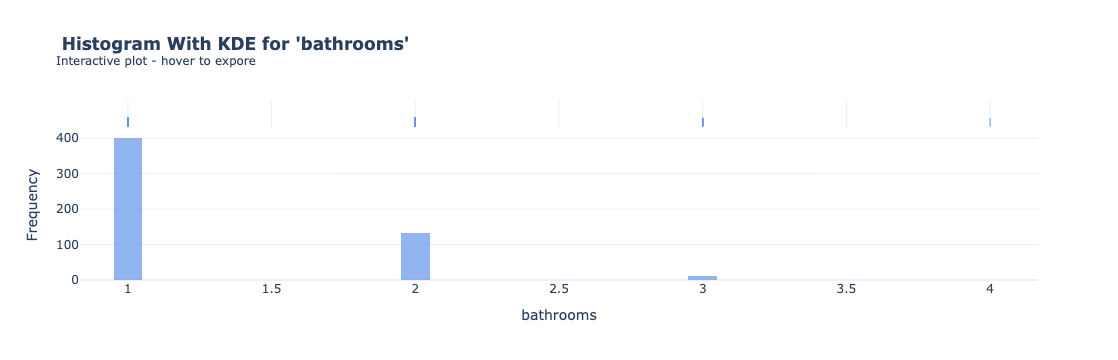

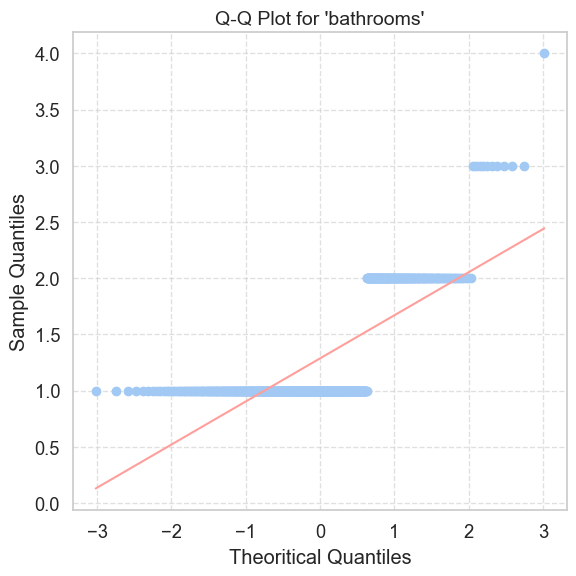


 Normality Tests for 'bathrooms':

 .Shapiro-Wilk: 3.1371009628200906e-34->Not Normal
 .D'Agostino K^2: 6.151418308348752e-35->Not Normal
 .Anderson-Darling: stat=112.508<crit= 0.781->Not Normal

 Interpretation:
 - p > 0.05 -> Data is likely Normal 
 - p <= 0.05 -> Data is NOT Normal 
 - For Anderson-Darling, if test statistic < critical value at 5%, then Normal 


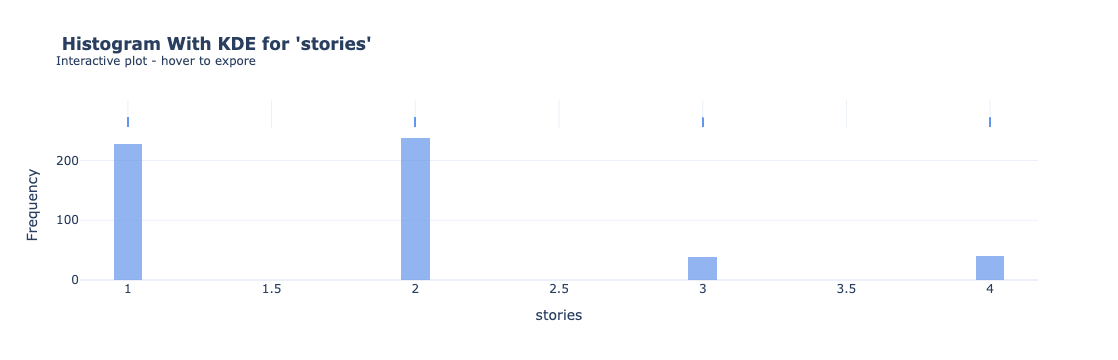

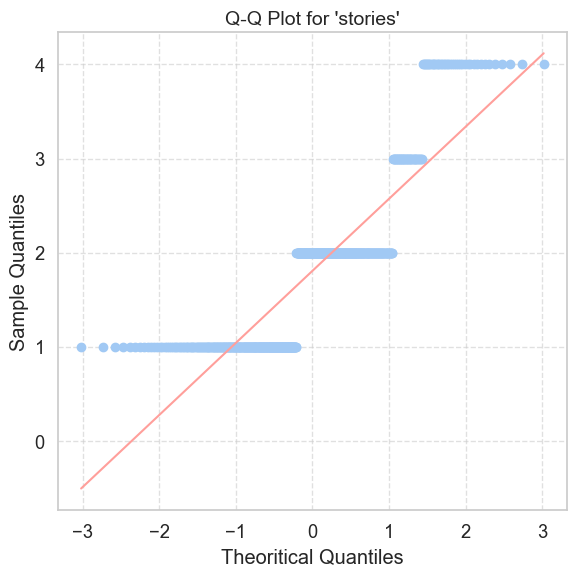


 Normality Tests for 'stories':

 .Shapiro-Wilk: 8.280536002517326e-27->Not Normal
 .D'Agostino K^2: 1.77289393309775e-18->Not Normal
 .Anderson-Darling: stat=47.223<crit= 0.781->Not Normal

 Interpretation:
 - p > 0.05 -> Data is likely Normal 
 - p <= 0.05 -> Data is NOT Normal 
 - For Anderson-Darling, if test statistic < critical value at 5%, then Normal 


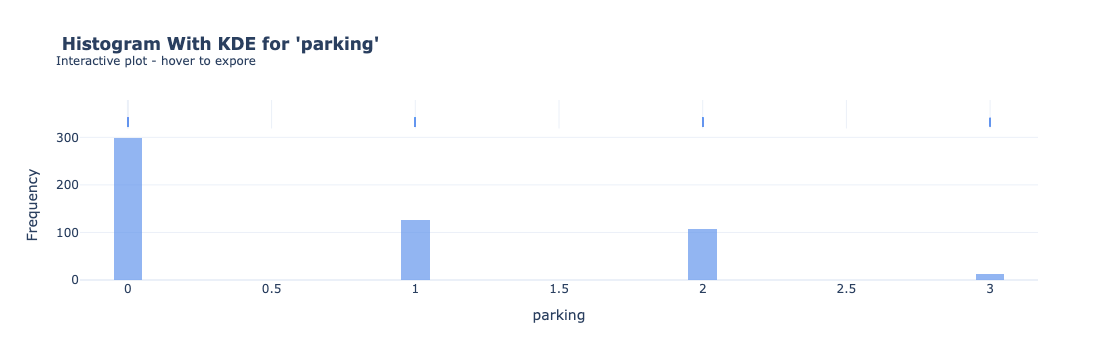

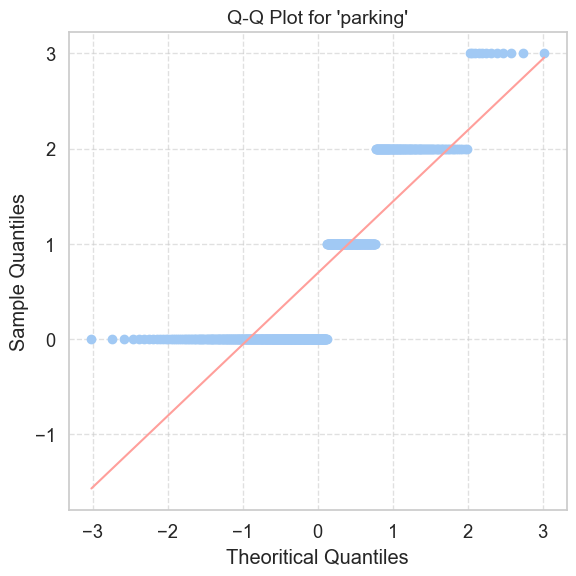


 Normality Tests for 'parking':

 .Shapiro-Wilk: 5.9207764294721305e-28->Not Normal
 .D'Agostino K^2: 5.837854178886895e-15->Not Normal
 .Anderson-Darling: stat=60.265<crit= 0.781->Not Normal

 Interpretation:
 - p > 0.05 -> Data is likely Normal 
 - p <= 0.05 -> Data is NOT Normal 
 - For Anderson-Darling, if test statistic < critical value at 5%, then Normal 


In [27]:
#function to check if column has outliers using IQR

def has_outliers(series):
    Q1 = series.quantile(0.25)
    Q3 = series.quantile(0.75)
    IQR = Q3 - Q1
    lower = Q1 - 1.5 * IQR
    upper = Q3 + 1.5 * IQR
    return ((series<lower) | (series>upper)).any()

#function to run statistical normality tests
def normality_tests(series):
    results = {}

    #Shapiro-Wilk Test
    shapiro_test, shapiro_p = stats.shapiro(series)
    results['Shapiro-Wilk']= (shapiro_p, 'Normal' if shapiro_p> 0.05 else 'Not Normal')

    #D'Agostino and Pearson's K^2 Test
    dagostino_stat, dagostino_p = stats.normaltest(series)
    results["D'Agostino K^2"] = (dagostino_p, 'Normal' if dagostino_p>0.05 else 'Not Normal')

    #Anderson-Darling Test
    ad_result = stats.anderson(series, dist = 'norm')
    ad_stat = ad_result.statistic
    ad_crit_5 = ad_result.critical_values[2] #5% level
    ad_interpretation = 'Normal' if ad_stat<ad_crit_5 else 'Not Normal'
    results["Anderson-Darling"] = (f"stat={ad_stat:.3f}<crit= {ad_crit_5:.3f}", ad_interpretation)

    return results

    
#final function: Plot histogram with KDE (Plotly)+ Q-Q plot(matplotlib)+ printtest results    
def analyze_column(df,column):
    data = df[column].dropna()

    #Run normality tests
    results = normality_tests(data)

    #--------------Plotly Histogram + KDE --------------------------------
    fig = px.histogram(data, x = column, marginal = "rug", nbins = 50, opacity = 0.7,
                       title= f"<b> Histogram With KDE for '{column}'</b> <br><sup>Interactive plot - hover to expore</sup>" ,
                       template = "plotly_white", histnorm = None)
    fig.update_traces(marker_color='cornflowerblue')
    fig.update_layout(
        xaxis_title = column,
        yaxis_title = "Frequency",
        showlegend = False
    )
    fig.show()

    #-------Q-Q plot using Matplotlib --------------------
    plt.figure(figsize = (6,6))
    stats.probplot(data, dist = "norm", plot = plt)
    plt.title (f"Q-Q Plot for '{column}'", fontsize = 14)
    plt.xlabel("Theoritical Quantiles")
    plt.ylabel("Sample Quantiles")
    plt.grid(True, linestyle = '--', alpha = 0.6)
    plt.tight_layout()
    plt.show()

    #-----------Show Results--------------
    print(f"\n Normality Tests for '{column}':\n")
    for test, (result, interp) in results.items():
        print(f" .{test}: {result}->{interp}")
    print("\n Interpretation:")
    print(" - p > 0.05 -> Data is likely Normal ")
    print(" - p <= 0.05 -> Data is NOT Normal ")
    print(" - For Anderson-Darling, if test statistic < critical value at 5%, then Normal ")

#Detect outlier columns
outlier_cols = [col for col in numeric_cols if has_outliers(df[col])]

#Run analysis for each column with outliers
for col in outlier_cols:
    analyze_column(df, col)

In [12]:
def remove_outliers_iqr(df, columns):
    df_clean = df.copy()

    for col in columns:
        Q1 = df_clean[col].quantile(0.25)
        Q3 = df_clean[col].quantile(0.75)
        IQR = Q3 - Q1

        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR

        #keep only rows within the bounds
        df_clean = df_clean[(df_clean[col] >= lower_bound) & (df_clean[col] <= upper_bound)]

    return df_clean

#Example usage

#Remove outliers for numeric columns
df_no_outliers = remove_outliers_iqr(df, numeric_cols)

print(f"Original dataset shape : {df.shape}")
print(f"After outlier removal; {df_no_outliers.shape}")

Original dataset shape : (545, 13)
After outlier removal; (365, 13)


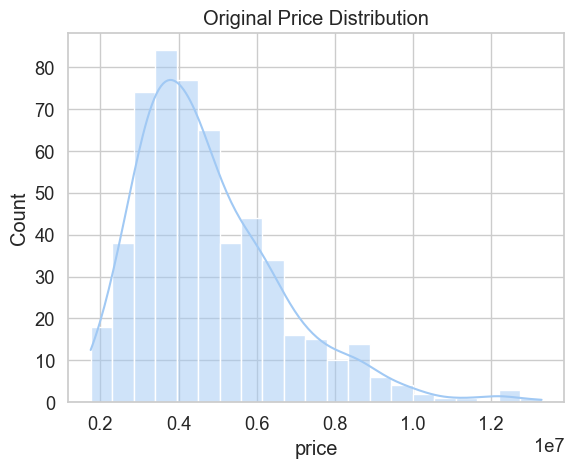

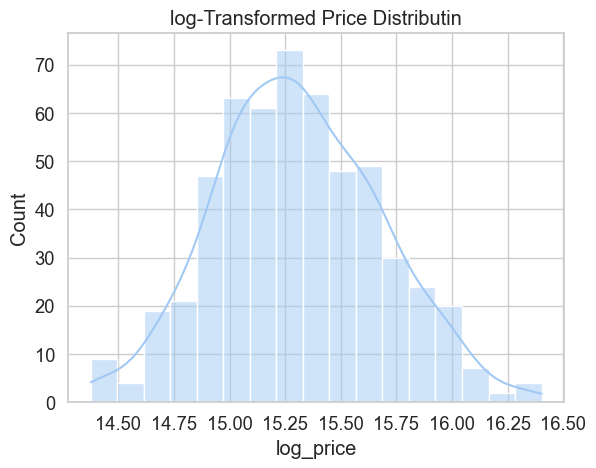

In [13]:
#Add log-transformed target
df['log_price'] = np.log1p(df['price']) # safer than log(price) if there are 0s

sns.histplot(df['price'], kde = True)
plt.title("Original Price Distribution")
plt.show()

sns.histplot(df['log_price'], kde = True)
plt.title("log-Transformed Price Distributin")
plt.show()

In [14]:
df.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus,log_price
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished,16.403275
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,no,furnished,16.321037
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished,16.321037
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished,16.318175
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,no,furnished,16.250001


In [15]:
#Binary categorical columns (yes/no)
binary_cols = ['mainroad', 'guestroom', 'basement', 'hotwaterheating',
               'airconditioning', 'prefarea']

for col in binary_cols:
    df[col] = df[col].map({'yes': 1, 'no': 0})

#One-hot encode non-binary column (furnishingstatus)
df= pd.get_dummies(df, columns = ['furnishingstatus'], drop_first = True ) 


In [16]:
df.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,log_price,furnishingstatus_semi-furnished,furnishingstatus_unfurnished
0,13300000,7420,4,2,3,1,0,0,0,1,2,1,16.403275,False,False
1,12250000,8960,4,4,4,1,0,0,0,1,3,0,16.321037,False,False
2,12250000,9960,3,2,2,1,0,1,0,0,2,1,16.321037,True,False
3,12215000,7500,4,2,2,1,0,1,0,1,3,1,16.318175,False,False
4,11410000,7420,4,1,2,1,1,1,0,1,2,0,16.250001,False,False


In [17]:
#Define numerical features (excluding 'price' and 'log price')

num_features = ['area', 'bedrooms', 'bathrooms', 'stories', 'parking']
scaler = StandardScaler()
df[num_features] = scaler.fit_transform(df[num_features])

In [18]:
df.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,log_price,furnishingstatus_semi-furnished,furnishingstatus_unfurnished
0,13300000,1.046726,1.403419,1.421812,1.378217,1,0,0,0,1,1.517692,1,16.403275,False,False
1,12250000,1.757010,1.403419,5.405809,2.532024,1,0,0,0,1,2.679409,0,16.321037,False,False
2,12250000,2.218232,0.047278,1.421812,0.224410,1,0,1,0,0,1.517692,1,16.321037,True,False
3,12215000,1.083624,1.403419,1.421812,0.224410,1,0,1,0,1,2.679409,1,16.318175,False,False
4,11410000,1.046726,1.403419,-0.570187,0.224410,1,1,1,0,1,1.517692,0,16.250001,False,False


In [19]:
#features (drop target and original price)
X = df.drop (['price', 'log_price'], axis = 1)
y = df['log_price']

#Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = .20 , random_state = 42)


In [20]:
#Train the model 

model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [21]:
# Predict on test data (Log scale)
y_pred_log = model.predict(X_test)
# Convert predictions back to original price scale
y_pred = np.expm1(y_pred_log) #inverse of log1p
y_true = np.expm1(y_test)
# Evaluate
r2= r2_score(y_true, y_pred)
rmse= root_mean_squared_error(y_true, y_pred)
mae= mean_absolute_error(y_true, y_pred)
print(f"R2 Score: {r2:.3f}")
print(f"RMSE: {rmse:.3f}")
print(f"MAE: {mae:.3f}")

R2 Score: 0.658
RMSE: 1314648.195
MAE: 960123.173


In [38]:
!pip install joblib

In [22]:
import joblib
joblib.dump(model, 'ml_model/Linear_Regression.pkl')

['ml_model/Linear_Regression.pkl']